# Project Information
## Linear Regression model building is divided into following parts:
- Understanding Data
- Visualising Data
- Data Prepaparation for Modelling
- Split Data into Train and Test data
- Rescaling Data
- Training the Model
- Residual Analysis
- Predictions and Evaluations on the test set
- Final Results and Analysis


## Submitted by : Abhishek Kumar Goyal (APFE21709647)

# Bike Sharing Assignment

Problem Statemtent:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.It wants to come up with a mindful business plan to be able to accelerate its revenue. The company wishes to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

###  1. IMPORTING AND UNDERSTANDING DATA

In [4]:
#Importing the data
bikesharing = pd.read_csv("day.csv")

In [5]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikesharing.shape

(730, 16)

#### Data contains 730 rows and 16 columns

In [7]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are no columns with any null values

In [8]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2. VISUALISING DATA

#### **a. Using pairplot**

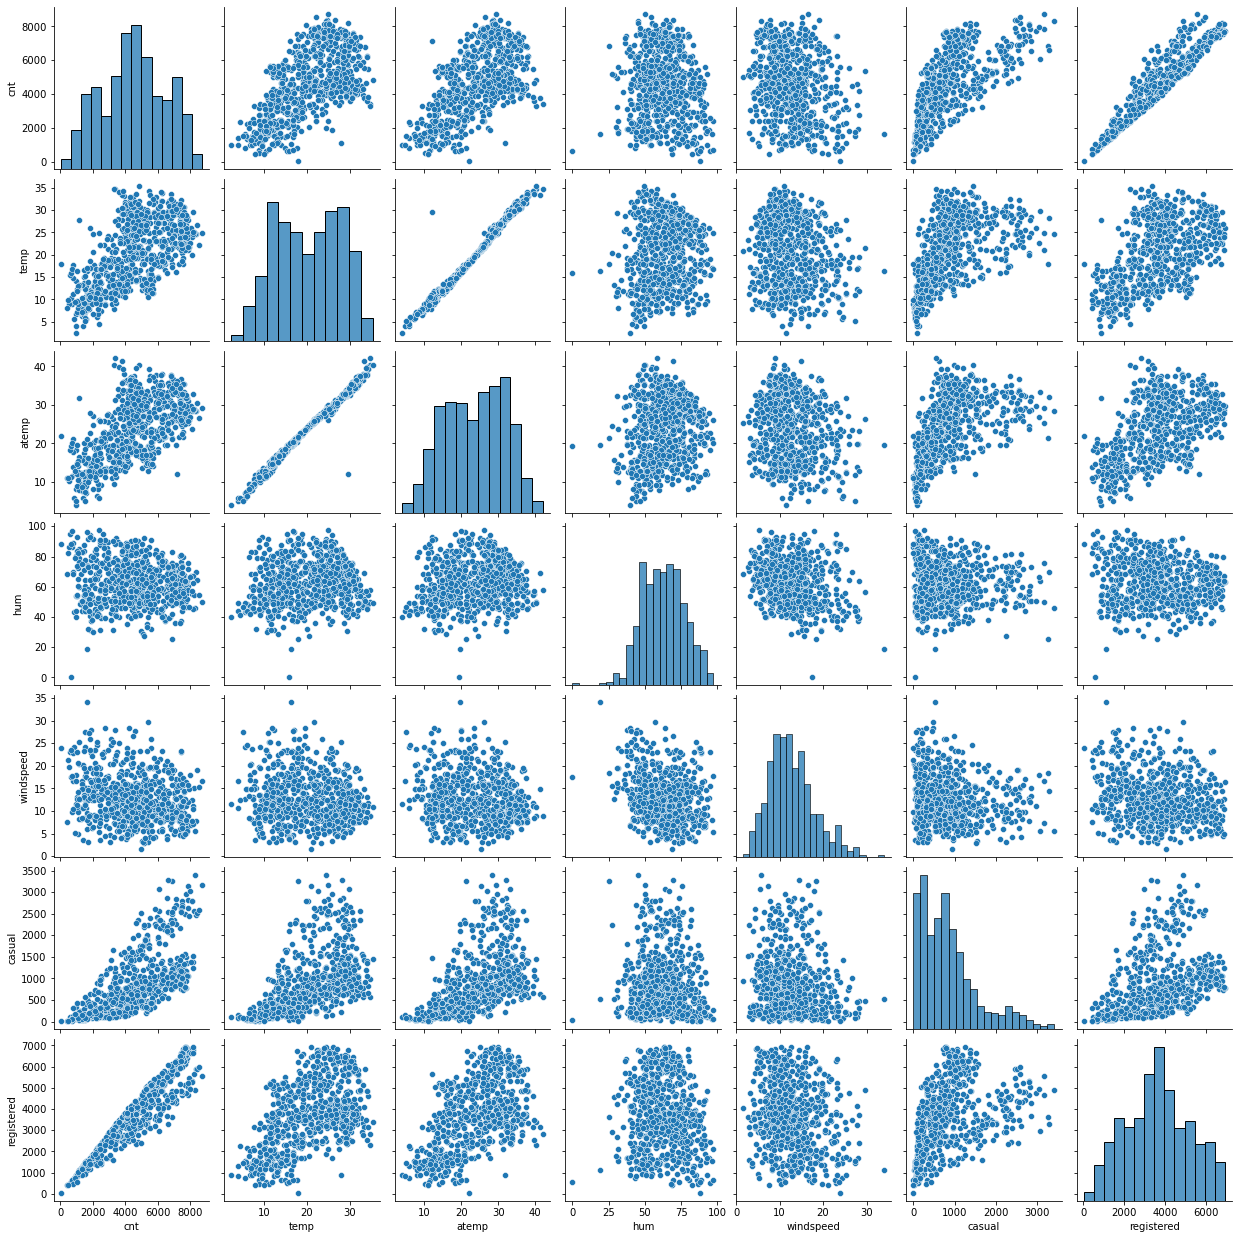

In [9]:
#Visualising the numeric variables using pairplot

sns.pairplot(data=bikesharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed','casual','registered'])
plt.show()

#### Some observations from above pairplot:
- Columns 'temp ' and 'atemp' seems to be collinear
- Column 'registered' looks collinear with 'cnt'.


#### **b. Using boxplots**

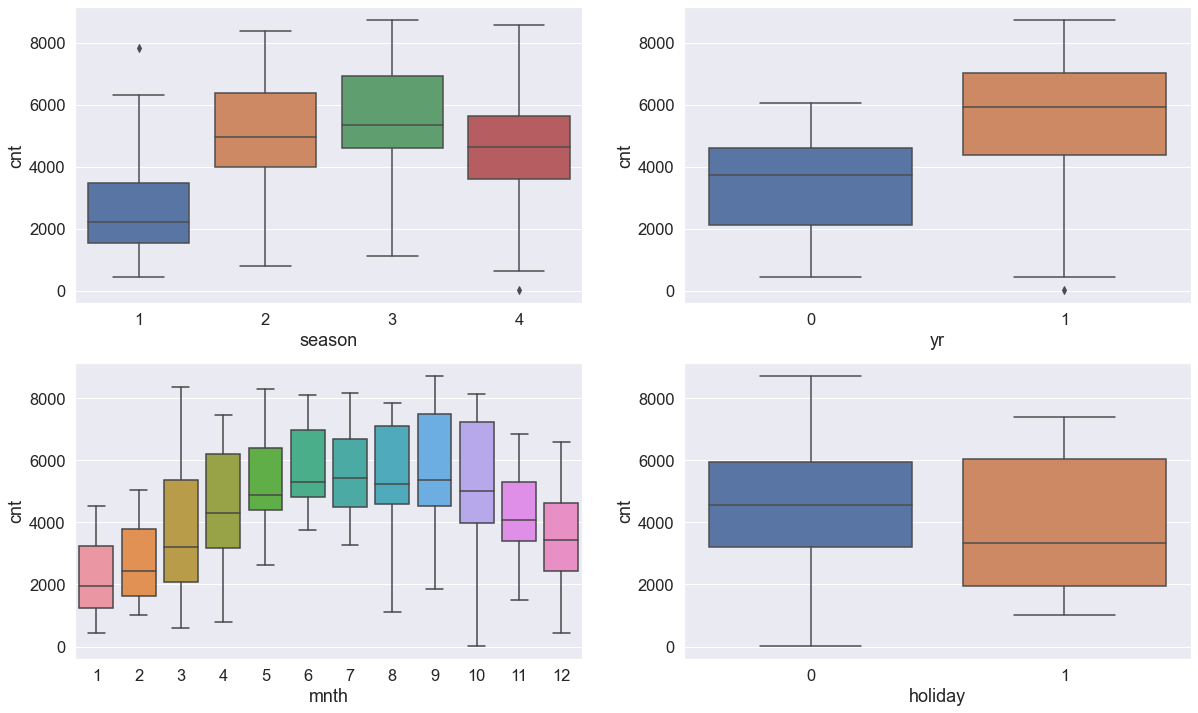

In [10]:
# Create multiple boxplots
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.5)
plt.subplot(2,2,1)
sns.boxplot(x= 'season', y='cnt', data=bikesharing)
plt.subplot(2,2,2)
sns.boxplot(x= 'yr', y='cnt', data=bikesharing)
plt.subplot(2,2,3)
sns.boxplot(x= 'mnth', y='cnt', data=bikesharing)
plt.subplot(2,2,4)
sns.boxplot(x= 'holiday', y='cnt', data=bikesharing)
plt.show()
sns.set()

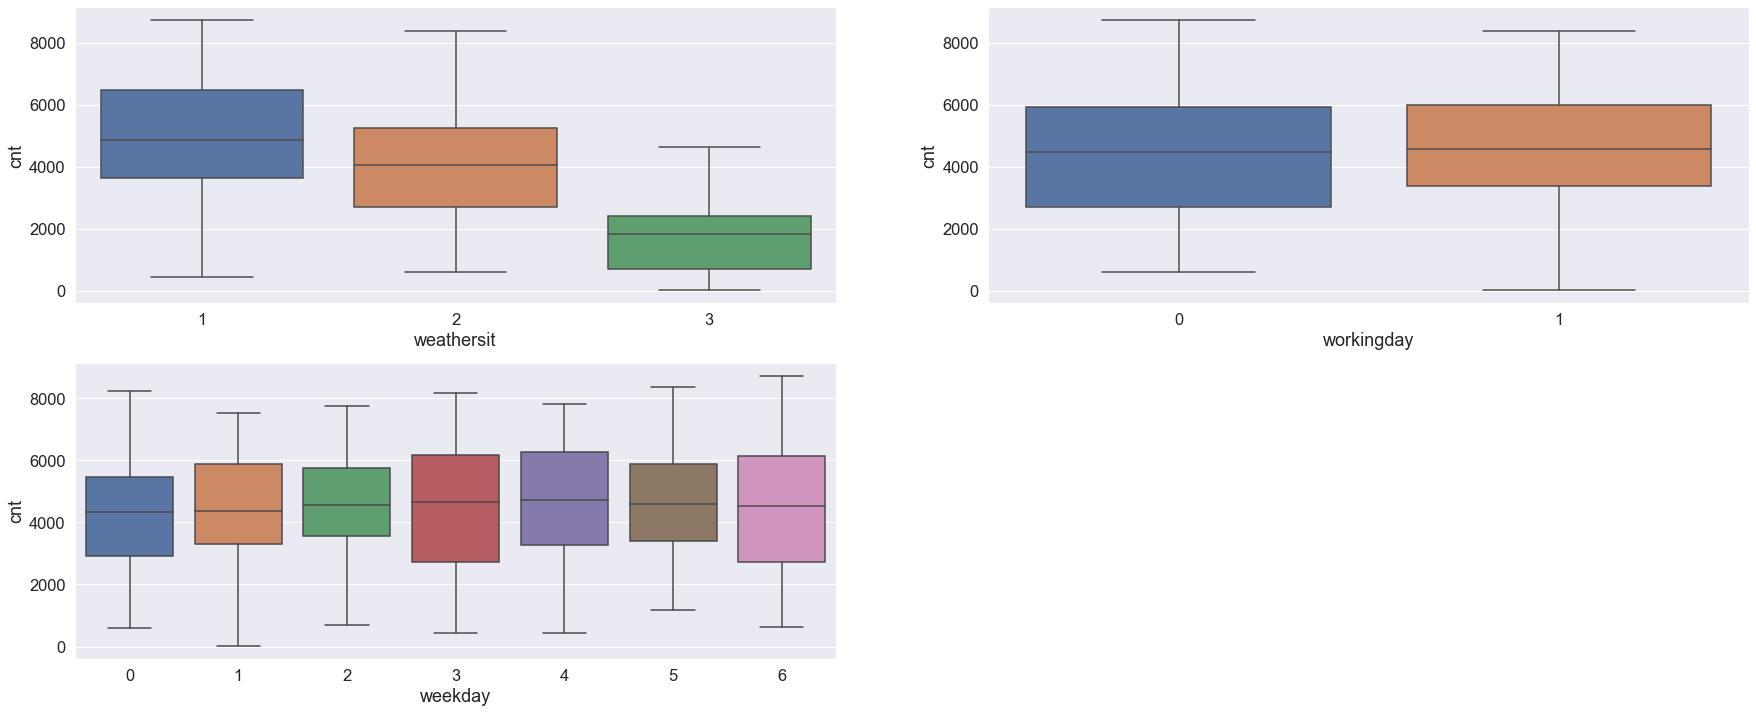

In [11]:
plt.figure(figsize=(30,12))
sns.set(font_scale = 1.5)
plt.subplot(2,2,1)
sns.boxplot(x= 'weathersit', y='cnt', data=bikesharing)
plt.subplot(2,2,2)
sns.boxplot(x= 'workingday', y='cnt', data=bikesharing)
plt.subplot(2,2,3)
sns.boxplot(x= 'weekday', y='cnt', data=bikesharing)
plt.show()
sns.set()

#### Some observations from above boxplots:
- Count of bike sharing is highest for the 'fall' season.
- Count of bike sharing is higher in 2019 than 2018.
- The average number of bikes used on different days of the week is nearaly same.
- The count of bikes sharing is low in 'spring' months.
- No bikes were used in weather situation :(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

#### **c. Using pointplots**

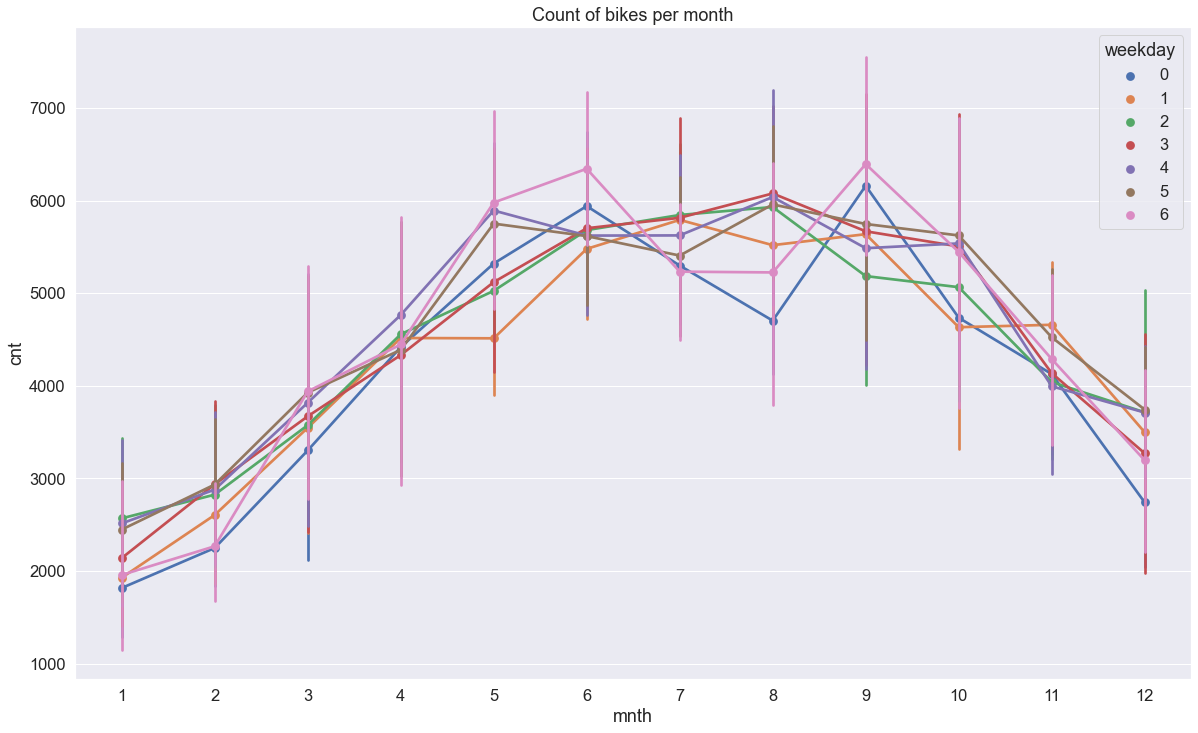

In [12]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)
sns.pointplot(x= 'mnth', y= 'cnt', hue= 'weekday', join= True, data= bikesharing)
plt.title("Count of bikes per month")
plt.show()
sns.set()

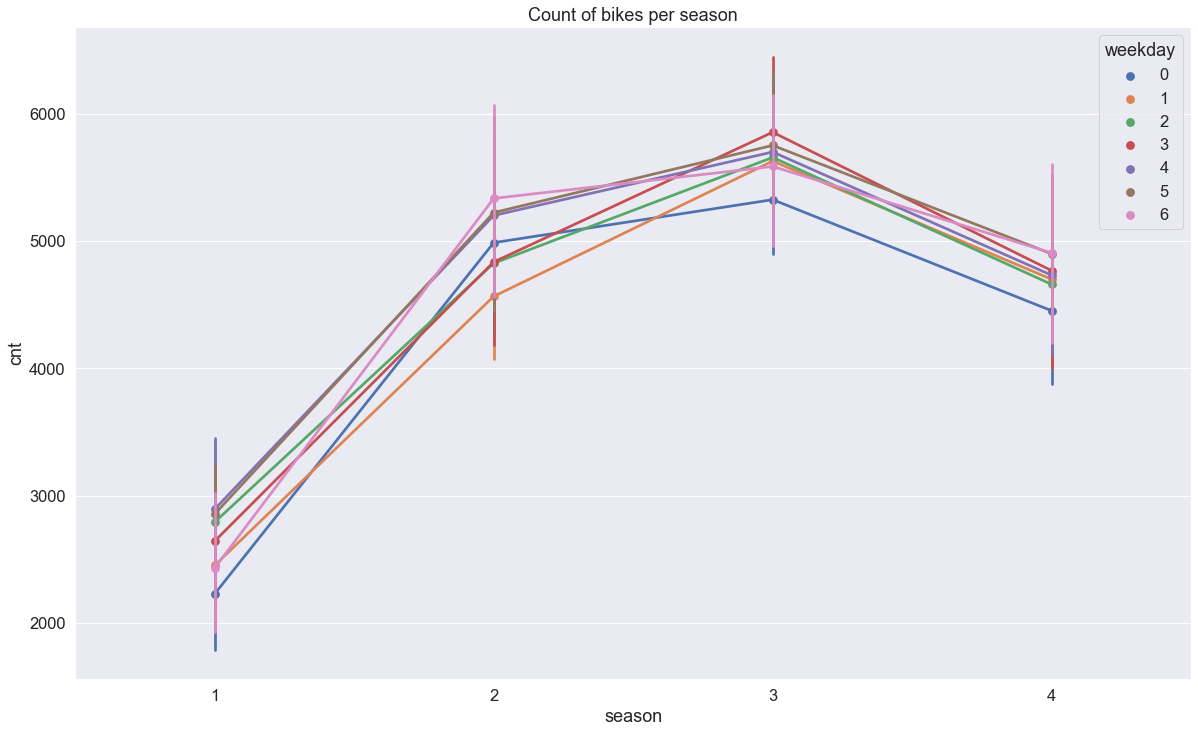

In [13]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)
sns.pointplot(x= 'season', y= 'cnt', hue= 'weekday', join= True, data= bikesharing)
plt.title("Count of bikes per season")
plt.show()
sns.set()

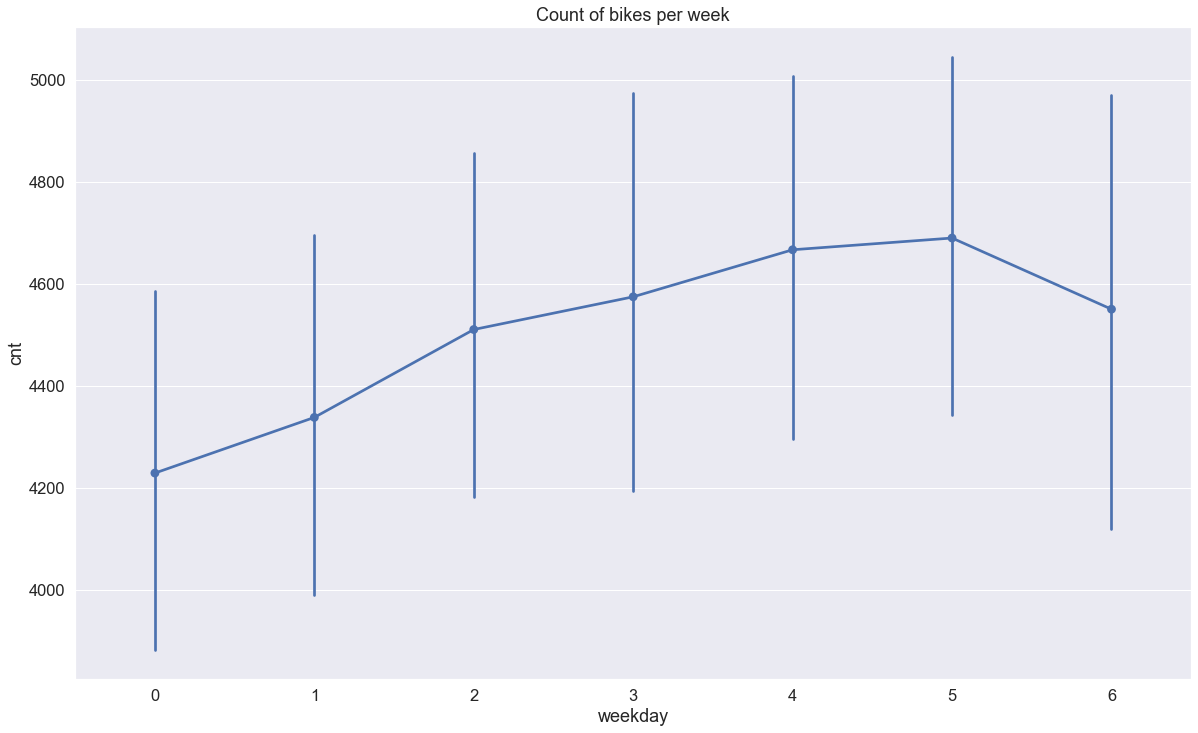

In [14]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)
sns.pointplot(x= 'weekday', y= 'cnt', join= True, data= bikesharing)
plt.title("Count of bikes per week")
plt.show()
sns.set()

#### Some observations from above plots:
- Count of bike sharing is highest the months (5 to 9) i.e.(May to September) as compared to other months.
- The count of bike sharing is lowest in the season '1' i.e 'Spring' season.
- The count of bike sharing is lowest on th weekday '1' i.e. Sunday as comapred to other days of the week

### 3. DATA PREPARATION FOR MODELLING

#### Drop some columns which does not seem to be useful

In [15]:
# Column 'instant' can be dropped as it is similar to index.
# Coloumn 'dteday' has date which can not be used much in our scenario(We have 'year' and 'mnth' columns).
# Columns 'casual' and 'registered' combine to form 'cnt' column. So they can be dropped.

columns_to_drop = ['instant','dteday','casual','registered']
bikesharing.drop(columns_to_drop, axis = 1, inplace = True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Checking the shape
bikesharing.shape

(730, 12)

#### Mapping the different categorical columns

In [17]:
# Seasons
bikesharing.season = bikesharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Months
bikesharing.mnth = bikesharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Days of the week
bikesharing.weekday = bikesharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Weather situation
bikesharing.weathersit = bikesharing.weathersit.map({1:'clear',2:'misty_cloudy',3:'light_snow_rain',4:'heavy_snow_rain'})

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bikesharing.shape

(730, 12)

#### Encoding columns with dummy values

In [19]:
# Creating dummy variables for ['season','mnth','weekday','weathersit']

bike_dummy = bikesharing[['season','mnth','weekday','weathersit']]
#dropping redundant dummy variable
bike_dummy = pd.get_dummies(bike_dummy,drop_first=True )
bikesharing = pd.concat([bikesharing, bike_dummy], axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow_rain,weathersit_misty_cloudy
0,spring,0,jan,0,sat,0,misty_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,misty_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
bikesharing.shape

(730, 34)

In [21]:
## Drop the columns where dummy variables were created
bikesharing.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow_rain,weathersit_misty_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
bikesharing.shape

(730, 30)

In [23]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_snow_rain', 'weathersit_misty_cloudy'],
      dtype='object')

### 4. SPLIT DATA INTO TRAIN AND TEST DATA

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

In [25]:
# Create training and testing data sets
df_train, df_test = train_test_split(bikesharing, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### 5. RESCALING DATA


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Using Min-Max scaling
# We tend to not rescale the Binary Encoded variable. Only scaling the numeric variables

# 1. Instantiate an object
scaler = MinMaxScaler()

#Creating list of numeric vars
num_vars = ['cnt','hum','windspeed','temp','atemp']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow_rain,weathersit_misty_cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow_rain,weathersit_misty_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can see that the max value and min value are 1 and 0 respectively for all the variables after scaling. 

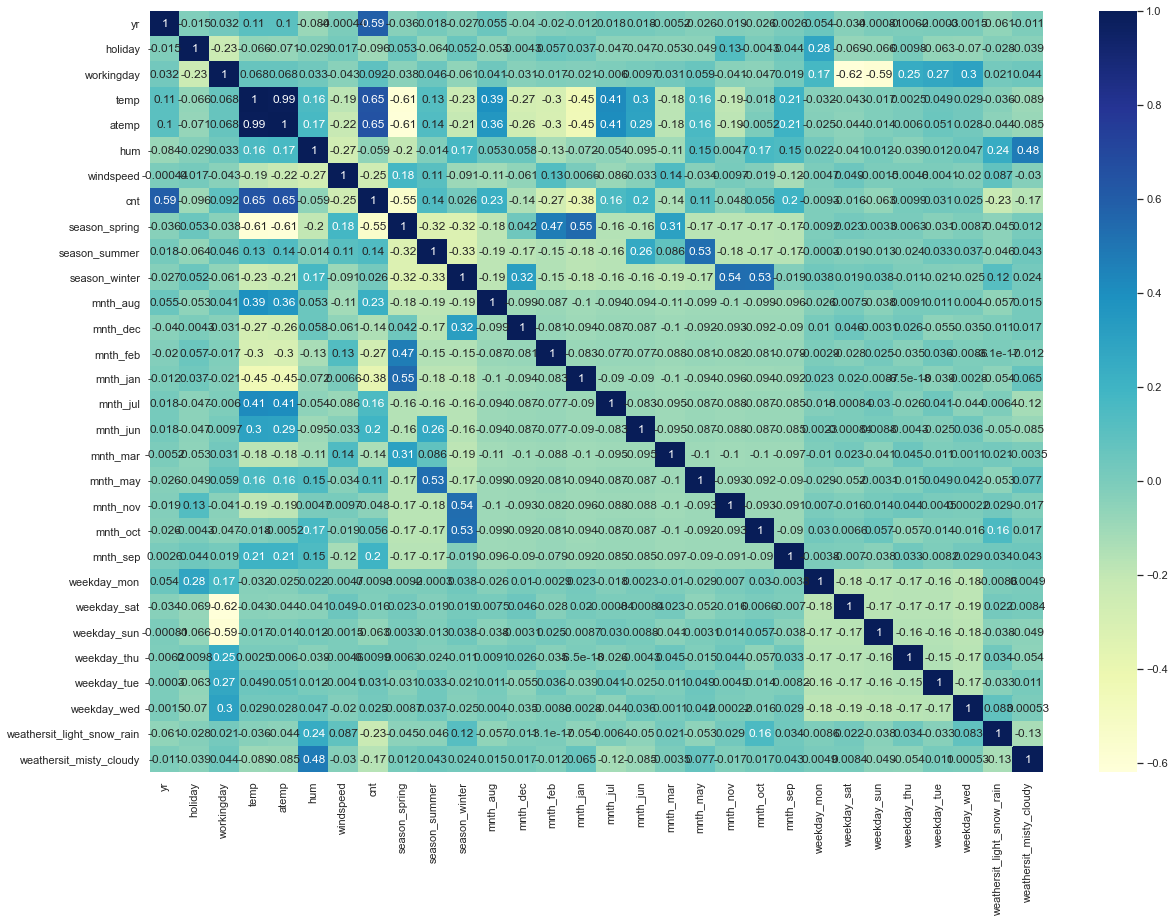

In [29]:
# Plotting the correlation matrix
plt.figure(figsize = (20,14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.show()

### 6. TRAINING THE MODEL

In [30]:
# X_train, y_train
# Creating y_train with 'cnt' variable and all other features in X_train

y_train = df_train.pop("cnt")
X_train = df_train

In [31]:
# Using RFE to build model
# Importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the number of output variables = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [33]:
# Listing all the feeatures as per the RFE selection
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_misty_cloudy', True, 1)]

In [34]:
#RFE supported variables
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_light_snow_rain',
       'weathersit_misty_cloudy'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [36]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# Creating X_train_rfe dataframe with all the RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weekday_sat,weekday_sun,weathersit_light_snow_rain,weathersit_misty_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [38]:
X_train_rfe.shape

(510, 15)

In [39]:
## Defining methods for
# 1. Building Model
# 2. Calculating VIF


def build_LR_model(X,y):
    X = sm.add_constant(X)  # Adding the constant for statsmodel.api
    lm = sm.OLS(y,X).fit()  # Fitting the  model
    print(lm.summary())  # Printing the model summary
    return X
    
def check_VIF_values(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns  # Naming the columns 
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # Calculating VIF values for each variable
    vif['VIF'] = round(vif['VIF'], 2)  # rounding off the vaues to 2 decimal points 
    vif = vif.sort_values(by = "VIF", ascending = False)  # Sorting the variables by decreasing VIF values
    return(vif)

#### Model 1

In [40]:
X_train_new = build_LR_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.11e-191
Time:                        23:51:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
#Calculating the Variance Inflation Factor
check_VIF_values(X_train_new)

,Features,VIF
2,holiday,inf
3,workingday,inf
12,weekday_sat,inf
13,weekday_sun,inf
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.62
5,hum,1.91
15,weathersit_misty_cloudy,1.57


- VIF factor and p-value of 'holiday' is pretty high. So dropping 'holiday' variable.

In [42]:
X_train_new.drop(['holiday'],axis = 1, inplace = True)

#### Model 2

In [43]:
X_train_new = build_LR_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.11e-191
Time:                        23:51:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [44]:
check_VIF_values(X_train_new)

,Features,VIF
0,const,114.08
2,workingday,9.07
11,weekday_sat,6.06
12,weekday_sun,5.74
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62
4,hum,1.91
14,weathersit_misty_cloudy,1.57


- VIF of 'workingday' is high. So dropping 'workingday' variable.

In [45]:
X_train_new.drop(['workingday'],axis = 1, inplace = True)

#### Model 3

In [46]:
X_train_new = build_LR_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.02e-189
Time:                        23:51:22   Log-Likelihood:                 509.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
check_VIF_values(X_train_new)

,Features,VIF
0,const,74.89
5,season_spring,5.01
2,temp,3.62
7,season_winter,3.48
6,season_summer,2.62
3,hum,1.91
13,weathersit_misty_cloudy,1.57
8,mnth_jul,1.49
9,mnth_sep,1.29
12,weathersit_light_snow_rain,1.25


- p-value of 'weekday_sat' is high. So dropping 'weekday_sat' variable.

In [48]:
X_train_new.drop(['weekday_sat'],axis = 1, inplace = True)

#### Model 4

In [49]:
X_train_new = build_LR_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.65e-190
Time:                        23:51:22   Log-Likelihood:                 508.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     497   BIC:                            -936.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [50]:
check_VIF_values(X_train_new)

,Features,VIF
0,const,74.37
5,season_spring,5.01
2,temp,3.62
7,season_winter,3.48
6,season_summer,2.62
3,hum,1.90
12,weathersit_misty_cloudy,1.56
8,mnth_jul,1.49
9,mnth_sep,1.29
11,weathersit_light_snow_rain,1.25


- VIF factor and p-value of 'season_spring' is comparatively high. So dropping 'season_spring' variable

In [51]:
X_train_new.drop(['season_spring'], axis=1, inplace = True)

#### Model 5

In [52]:
X_train_new = build_LR_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     236.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.63e-189
Time:                        23:51:27   Log-Likelihood:                 504.70
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     498   BIC:                            -934.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
check_VIF_values(X_train_new)

,Features,VIF
0,const,44.91
3,hum,1.88
2,temp,1.60
11,weathersit_misty_cloudy,1.55
7,mnth_jul,1.43
5,season_summer,1.33
6,season_winter,1.29
10,weathersit_light_snow_rain,1.24
8,mnth_sep,1.19
4,windspeed,1.18


- p-value of 'mnth_jul' is comparatively high. So dropping 'mnth_jul' variable

In [54]:
X_train_new.drop(['mnth_jul'], axis=1, inplace = True)

#### Model 6

In [55]:
X_train_new = build_LR_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.73e-189
Time:                        23:51:30   Log-Likelihood:                 501.76
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     499   BIC:                            -934.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
check_VIF_values(X_train_new)

,Features,VIF
0,const,44.91
3,hum,1.86
10,weathersit_misty_cloudy,1.55
2,temp,1.27
6,season_winter,1.25
9,weathersit_light_snow_rain,1.24
5,season_summer,1.19
4,windspeed,1.18
7,mnth_sep,1.11
1,yr,1.03


#### Observations from the model:
- Model looks good with R-squared value of **0.837** and Adjusted R-squared value of **0.834**
- VIF value of all 10 variables is **less than 2**
- P significance values for all 10 varibales is **0**

### 7. RESIDUAL ANALYSIS

In [57]:
# Check if the error terms are normally distributed
# Calculating the predicted results using our LR model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new) # Predicited results
y_train_pred.head()

576    0.749499
426    0.499978
728    0.342884
482    0.600127
111    0.264672
dtype: float64

#### Assumptions of Linear Regression

#### a. Error terms are normally distributed

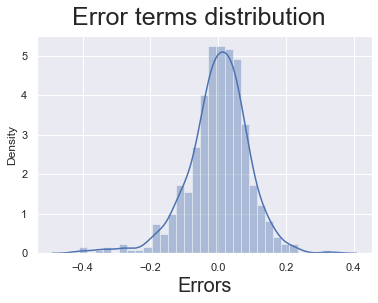

In [58]:
#Computing the residuals using predicted and actual values

fig = plt.figure()
res = y_train - y_train_pred 
sns.distplot(res)
fig.suptitle('Error terms distribution', fontsize = 25)
plt.xlabel('Errors', fontsize = 20)
plt.show()

- From the above distribution, we can see that the error terms are **normally distributed** with mean centered around 0.

#### b. Error terms have constant variance (Homoscedasticity)

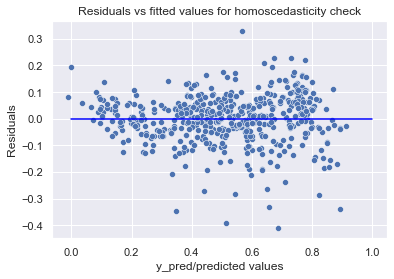

In [59]:
fig = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
fig = sns.lineplot([0,1],[0,0],color='blue')
fig = plt.title('Residuals vs fitted values for homoscedasticity check')

- From the above plot, we can see that the error terms have no discernible pattern and hence have **constant variance**.

#### c. Little or no Multicollinearity between the features

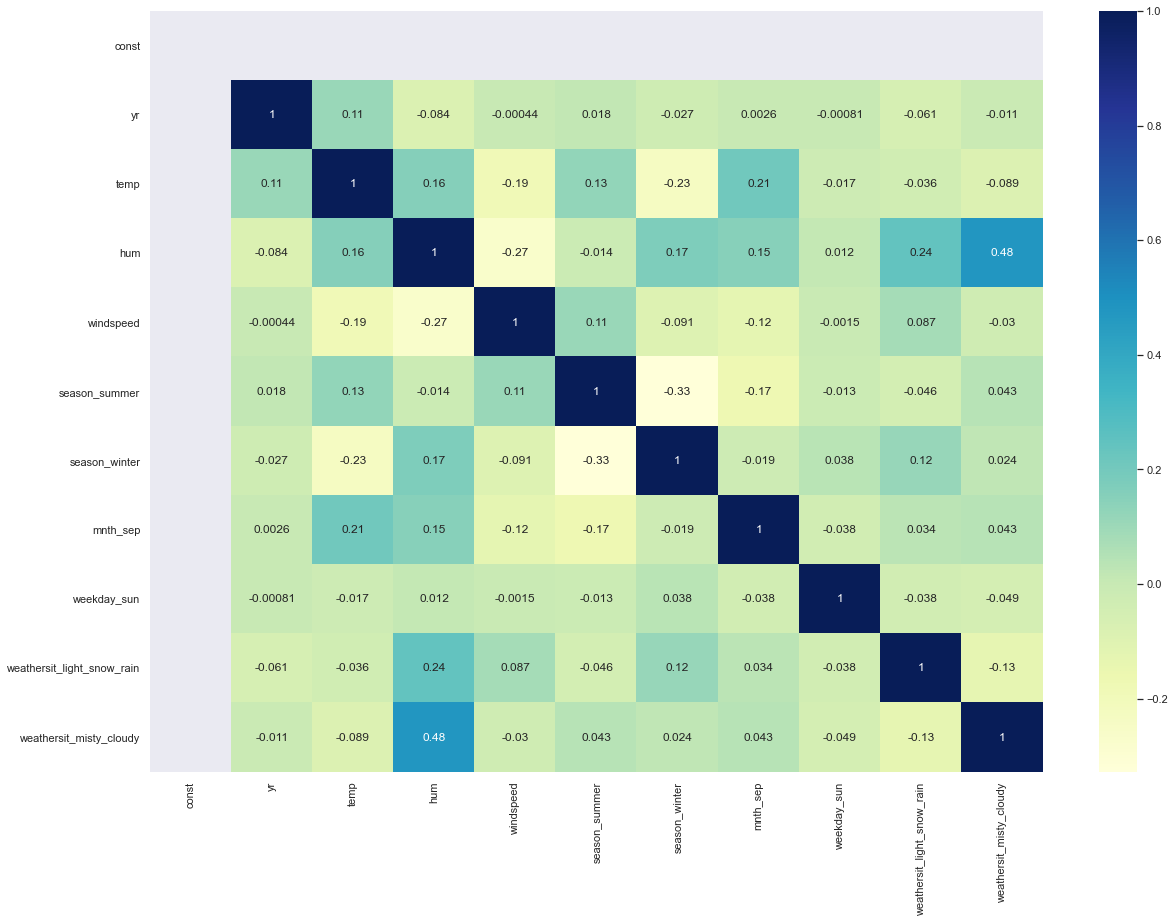

In [60]:
plt.figure(figsize = (20,14))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.show()

- From the above heatmap, we can see that there is **little or no correlation** among the variables.

### 8. PREDICTIONS AND EVALUATIONS ON THE TEST SET

In [61]:
# Preprocessing on the test set (To be done similar to what was done for training dataset)
# Creating list of numeric vars

num_vars = ['cnt','hum','windspeed','temp','atemp']

# 2. Transform on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow_rain,weathersit_misty_cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow_rain,weathersit_misty_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# X_test, y_test
# Creating y_test with 'cnt' variable and all other features in X_test

y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
# Creating X_test_new by considering same variables from X_train which we obtained while building the model
X_train_new = X_train_new.drop('const',axis=1)

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Calculating the predicted values on the test dataset
y_pred = lm.predict(X_test_new)

#### Model Evaluations

- Calculating the R-squared value on the test data

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)  #R-squared value
print(r2)

0.8031596446334363


- Calculating the Adjusted R-squared value on the test data

In [67]:
# n is the number of rows in X_test
n = X_test_new.shape[0]

# p (Number of features) is the shape along axis 1
p = X_test_new.shape[1]

# Adjusted R-squared is calculate by using the given formula:

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.7927498181477045

Observations from the test data:
- When we use the model on test data, we obtain a R-squared value of **0.803** and Adjusted R-squared value of **0.793**


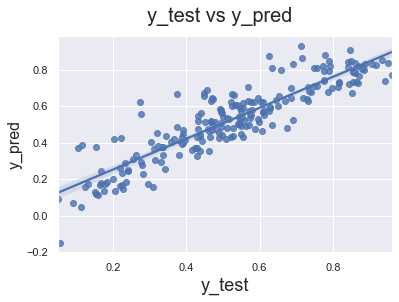

In [68]:
# Evaluation of the Model
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
sns.regplot(x = y_test, y = y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=18)             # X-label
plt.ylabel('y_pred', fontsize=16)             # Y-label
plt.show()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.73e-189
Time:                        23:52:27   Log-Likelihood:                 501.76
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     499   BIC:                            -934.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 9. FINAL RESULTS AND ANALYSIS

#### Final Results
- Train data R-sqaured value : **0.837**
- Train data Adjusted R-squared value : **0.834**
- Test data R-sqaured value : **0.803**
- Test data Adjusted R-squared value : **0.793**
- Equation of the best-fit line obtained from this model is:
```
cnt = 0.2236 + 0.5739*temp + 0.2293*yr + 0.1389*season_winter + 0.1015*mnth_sep + 0.0917*season_summer - 0.0429*weekday_sun - 0.0517*weathersit_misty_cloudy - 0.1676*hum - 0.1874*windspeed - 0.2376*weathersit_light_snow_rain

```


### Significant features to be considered by BoomBikes for increasing their business

- **temp** : When the temperature is moderate, there is an increase in the number of bikes rented.
- **year** : It has been observed that there has been an increase in the number of users using shared bikes. Hence the count tends to increase with thee coming year.
- **season** : The number of bikes rented is high in summers and winters.
- **weather** : More number of bikes are rented when weather is clear or a bit cloudy. People do not rent a bike when the there is heavy rainfall or snowfall. 
- **weekday** : There are lesser chances of users renting a bike on a Sunday as compared to other days of the week.

### In view of the above analysis, in order to increase their revenue, the company should try to provide more rental bikes in the summer season and other seasons as well except for the spring season where few users rent a bike. They should also try to increase renting on days when the temperture is moderate with clear skies and no forecast of rains. When everything returns to normalcy, they must expect a rise in the number of users as compared to the previous year.  